# Exploratory Data Analysis (EDA)

# STEP 1: Import the necessary libraries

In [31]:
import pandas as pd # Import the pandas library for data analysis and manipulation
import missingno as msno # Import missingno library for visualizing missing data.
import matplotlib.pyplot as plt # Import matplotlib library for data visualization. 
from wordcloud import WordCloud # Import WordCloud class from the wordcloud library for generating word clouds.
import sweetviz as sv # Import sweetviz library for automatic EDA report generation.  
import seaborn as sns # Import seaborn library for advanced data visualization.

---

# STEP 2: Load the data file

In [32]:
# Read the CSV file into a pandas DataFrame. ES: Leer el archivo CSV en un DataFrame de pandas.
df_movies_eda = pd.read_csv('../data/movies_dataset_final.csv') 

---

# STEP 3: Set the display options to show all columns

In [33]:
# Set the display option to show all columns in the DataFrame. 
pd.set_option('display.max_columns', None) 

---

# STEP 4: Display the first few rows of the DataFrame

In [34]:
# Display the first few rows of the DataFrame.
df_movies_eda.head()  

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,belongs_to_collection_name,release_year,return,genres,production_companies,production_countries,spoken_languages,cast,crew
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,1995,12.451801,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,1995,4.043035,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Larry J. Franco
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,1995,0.000000,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['English'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,1995,5.090760,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['English'],"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,1995,0.000000,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['English'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Alan Silvestri


---

# STEP 5: Check the amount of missing values in each column

In [35]:
# Print the number of missing values in each column of the DataFrame. 
print(df_movies_eda.isnull().sum())  

budget                            0
id                                0
original_language                11
overview                        941
popularity                        0
release_date                      0
revenue                           0
runtime                         246
status                           80
tagline                       24977
title                             0
vote_average                      0
vote_count                        0
belongs_to_collection_name    40887
release_year                      0
return                            0
genres                            0
production_companies              0
production_countries              0
spoken_languages                  0
cast                              0
crew                              0
dtype: int64


---

# STEP 6: Generate a histogram of the "vote_average" attribute

<Axes: >

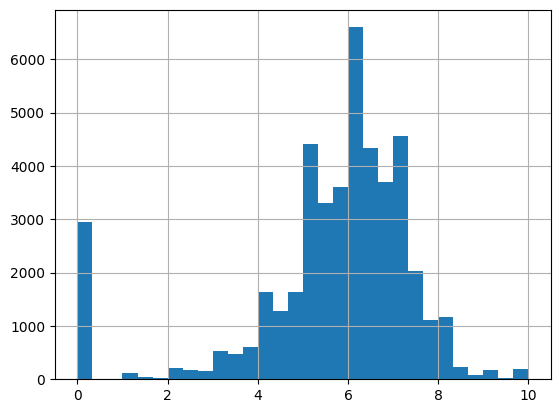

In [36]:
# Plot a histogram of the "vote_average" attribute. ES: Generar un histograma del atributo "vote_average".
df_movies_eda['vote_average'].hist(bins=30) 

---

# STEP 7: Calculate the correlation matrix and display it as a heatmap

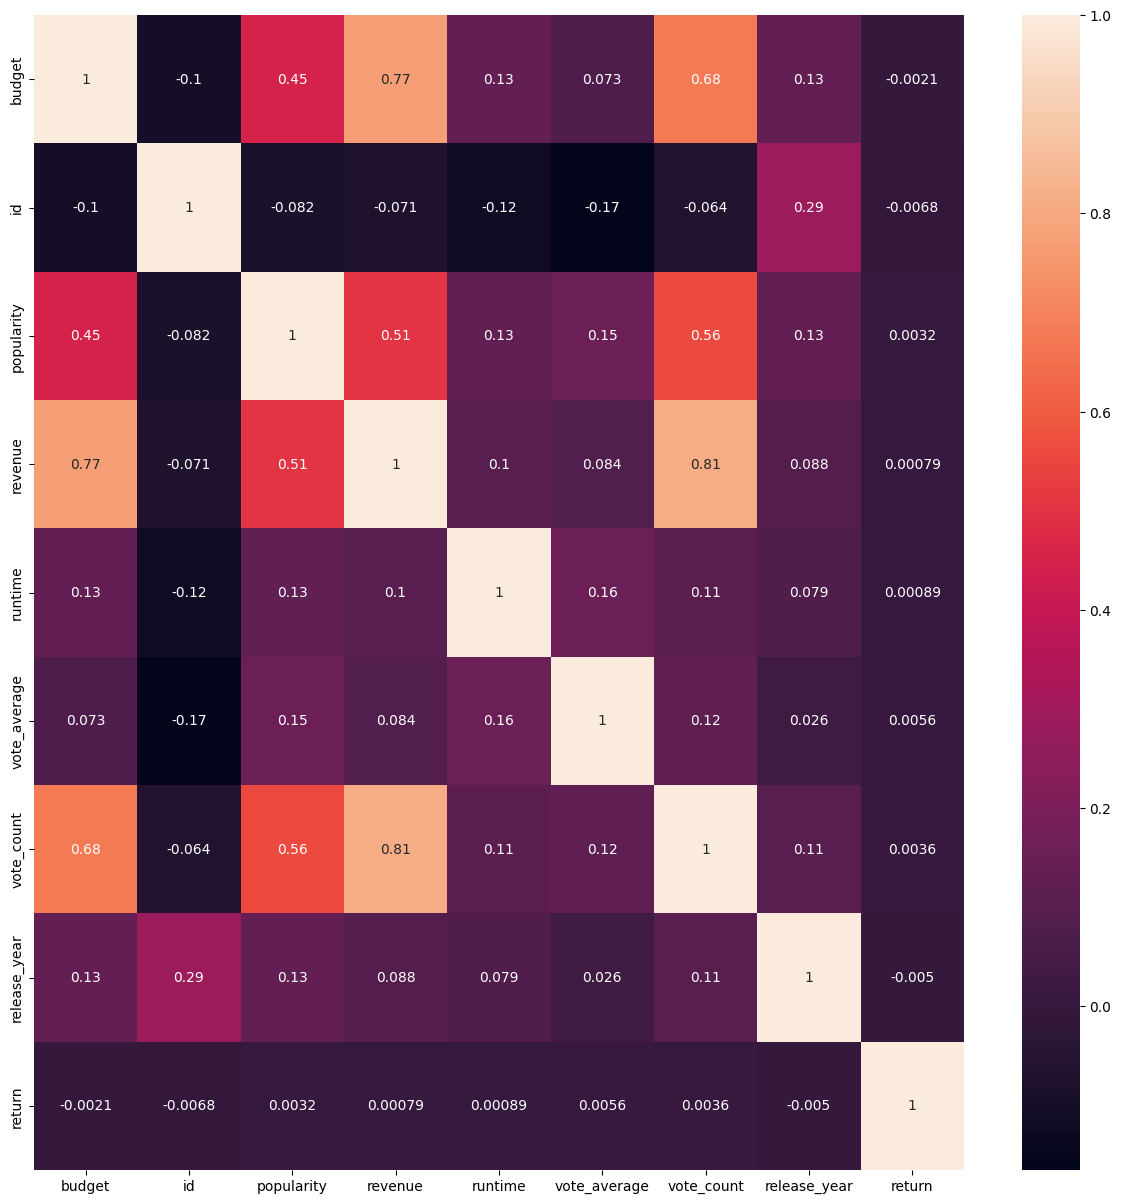

In [37]:
df_aux = df_movies_eda[['budget', 'id','popularity','revenue', 'runtime',
                        'vote_average', 'vote_count', 'release_year', 'return']]
 # Calculate the correlation matrix. 
corr_matrix = df_aux.corr() 
plt.figure(figsize=(15,15))
# Plot a heatmap of the correlation matrix.
sns.heatmap(corr_matrix, annot=True) 
plt.show()

---

# STEP 8: Visualize the missing data using a matrix and a bar chart

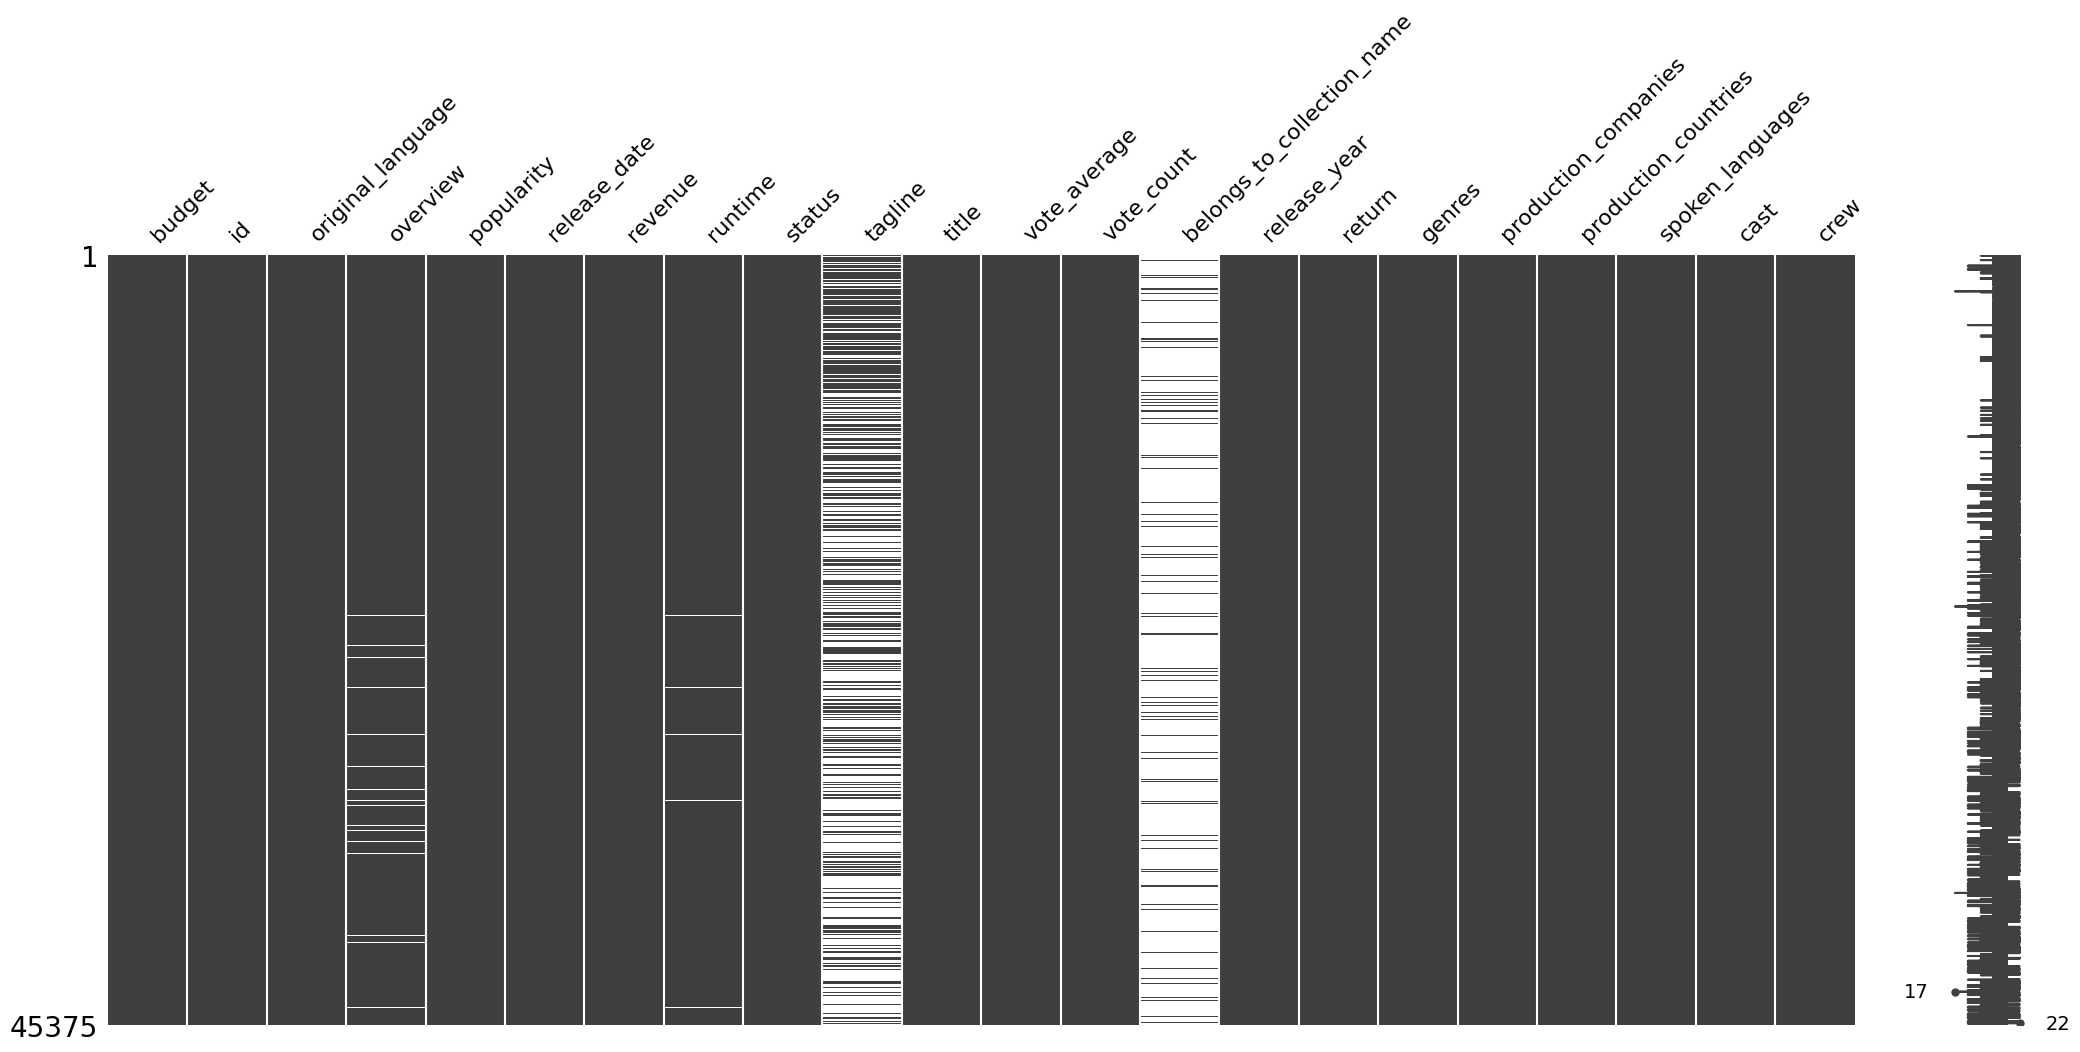

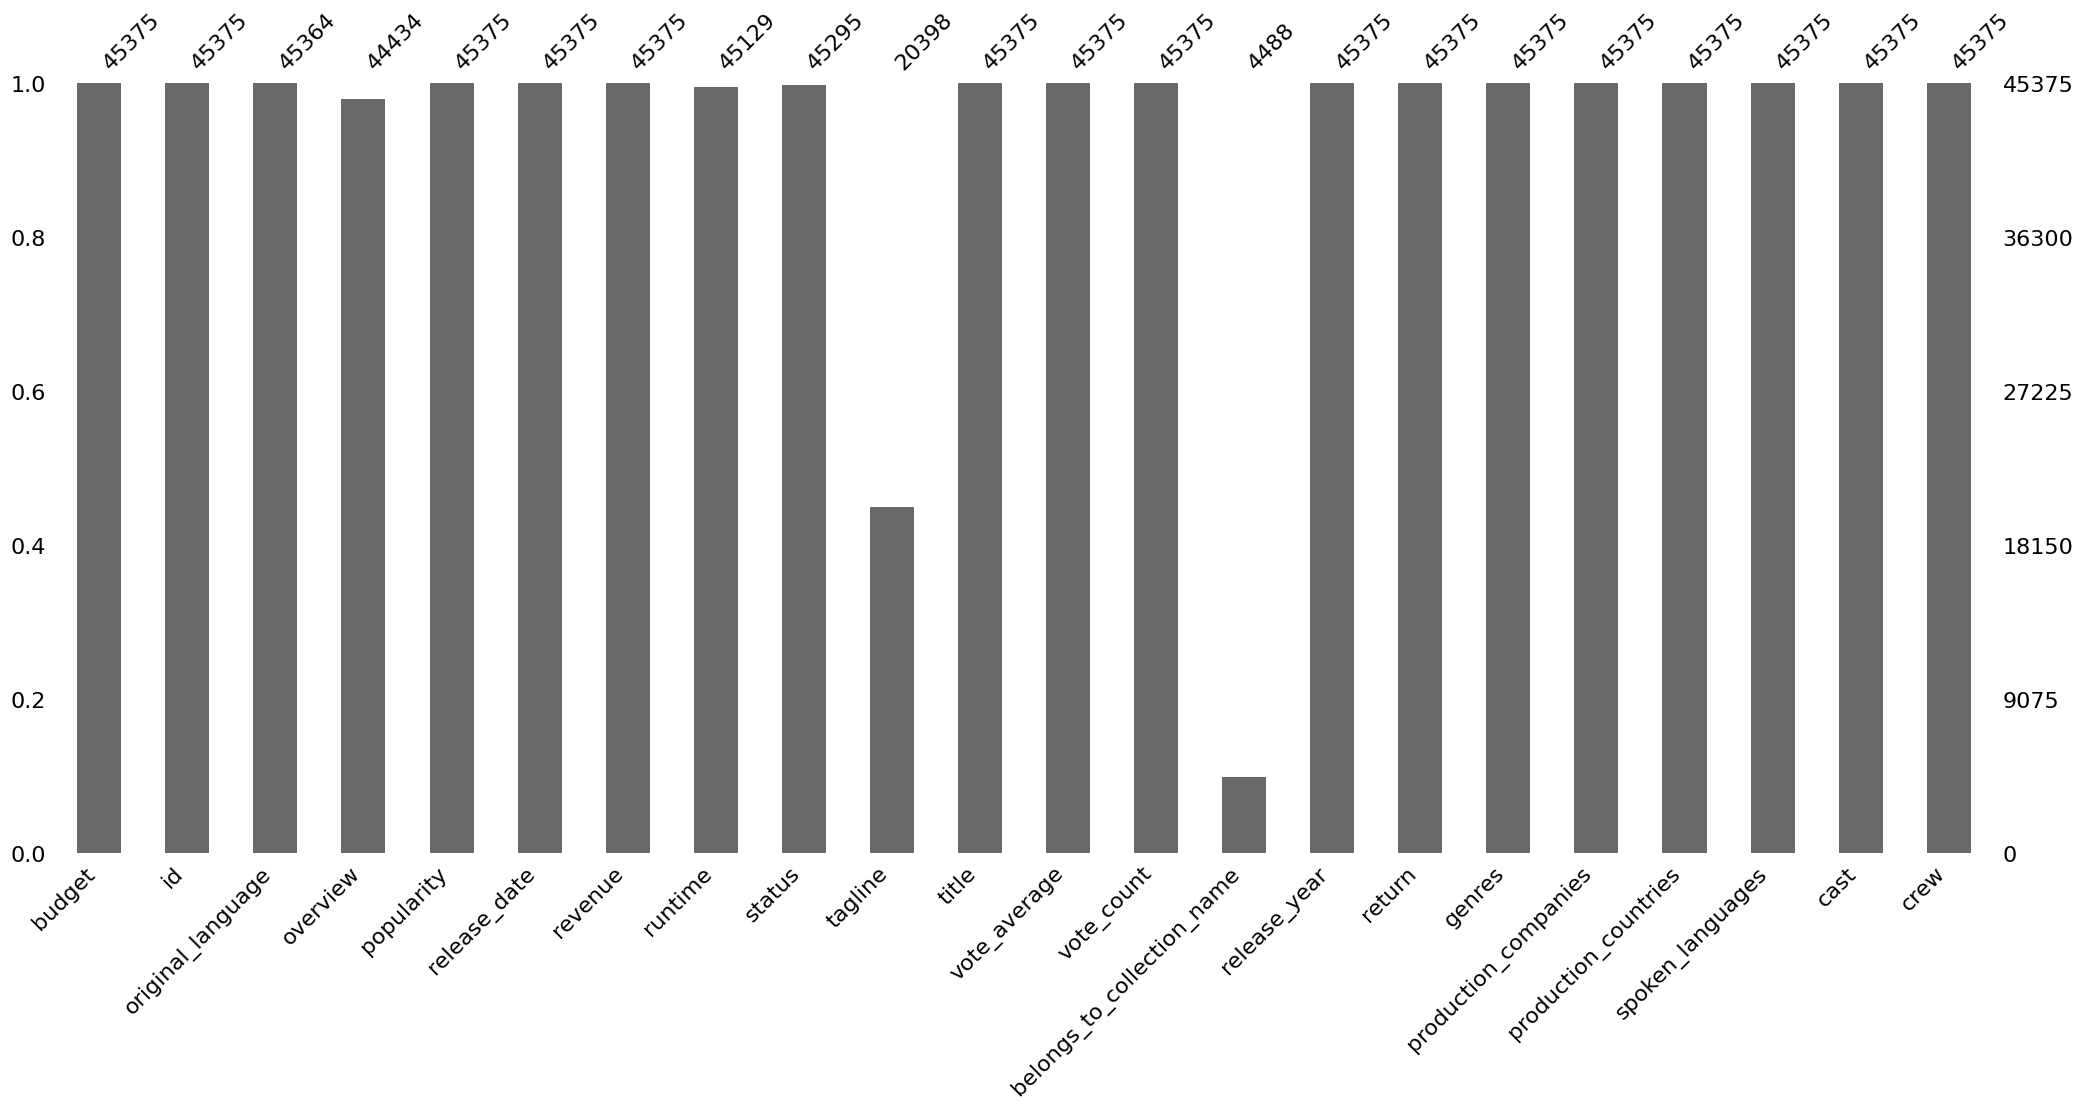

In [38]:
# Plot a matrix showing the missing data.
msno.matrix(df_movies_eda)  
plt.show()

# Plot a bar chart showing the missing data. 
msno.bar(df_movies_eda)  
plt.show()

---

# STEP 10: Generate a word cloud of the "genres" column

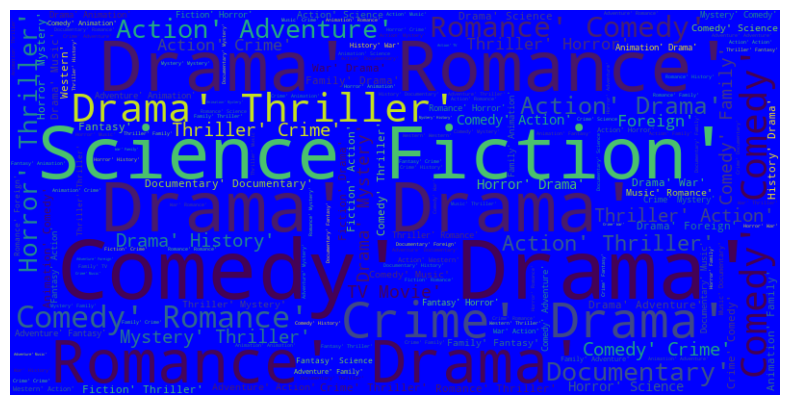

In [39]:
# Filter out the non-null values in the "genres" column.
filtered_cast = df_movies_eda['genres'].dropna()  
# Concatenate all the values in the filtered column. 
column = ' '.join(filtered_cast) 
# Generate a word cloud based on the concatenated values. 
wordcloud = WordCloud(width=800, height=400, background_color='blue').generate(column)  
plt.figure(figsize=(10, 5))
# Display the word cloud. 
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")
plt.show()

---

# STEP 11: Visualization of the Distribution of Revenue and Budget

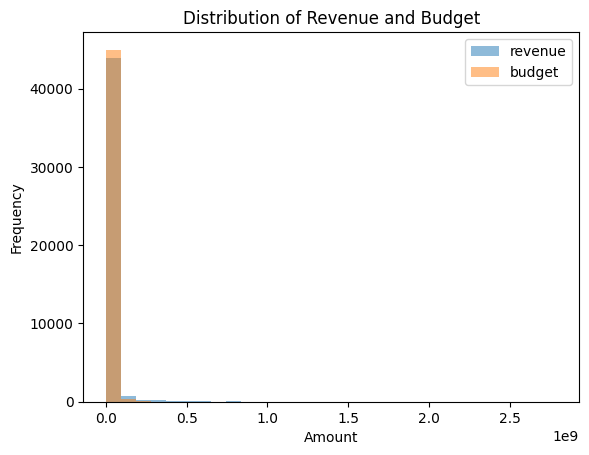

In [40]:
# Plot a histogram of additional numeric variables to visualize their distribution.
df_movies_eda[['revenue', 'budget']].plot(kind='hist', bins=30, alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue and Budget')
plt.show()

---

# STEP 12: Summary Statistics of Revenue and Budget

In [41]:
# Calculate summary statistics for additional numeric variables.
summary_stats = df_movies_eda[['revenue', 'budget']].describe()
print(summary_stats)

            revenue        budget
count  4.537500e+04  4.537500e+04
mean   1.123035e+07  4.232698e+06
std    6.439064e+07  1.744004e+07
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00
max    2.787965e+09  3.800000e+08


---

# STEP 13: Relation between Revenue and Popularity

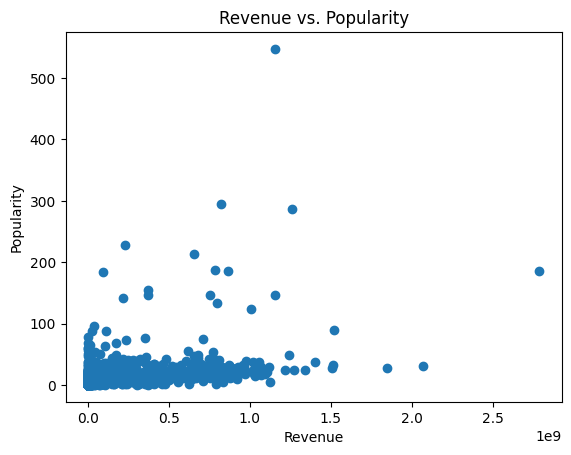

In [42]:
# Scatter plot of revenue vs. popularity to examine their relationship.
plt.scatter(df_movies_eda['revenue'], df_movies_eda['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs. Popularity')
plt.show()

---

# STEP 14: Relationship between Duration (Runtime) and Average Votes (vote_average)

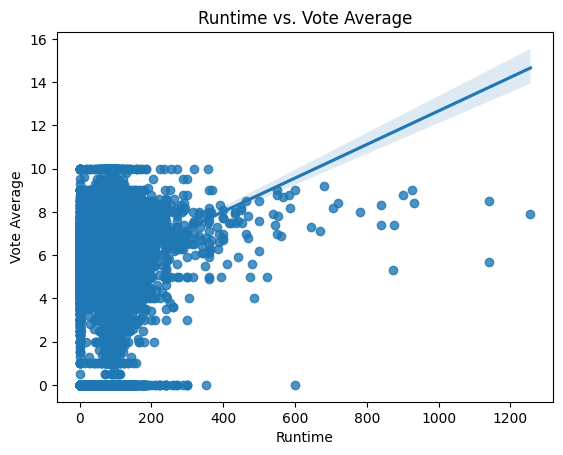

In [43]:
# Scatter plot with regression line and correlation coefficient to analyze the relationship between runtime and vote average.
sns.regplot(x='runtime', y='vote_average', data=df_movies_eda)
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.title('Runtime vs. Vote Average')
plt.show()